## Recommendation 1: Genres based on Popularity and Voter Average

### Imported packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
con = sqlite3.connect('Data/im.db')
cursor_obj = con.cursor()

### Imported Data sets

In [3]:
mov_gross = pd.read_csv('Data/bom.movie_gross.csv')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')
mov_info = pd.read_table('Data/rt.movie_info.tsv')
reviews = pd.read_table('Data/rt.reviews.tsv', encoding= 'unicode_escape')
rot_tom = pd.read_csv('Data/rotten_tomatoes_movies.csv')
db_mov = pd.read_csv('Data/tmdb.movies.csv', delimiter = ",")

### Looked at each dataset.info() to find the relevant information. We'll be looking at genres of movies based on their popularity

In [4]:
db_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Exploding the genre column to be able to plot the genres based on its popularity. created a genre dictionary from imdb genre ids


In [5]:
genre_dic = {'Action'      :    28,
'Adventure'    :   12,
'Animation'     :  16,
'Comedy'         : 35,
'Crime'          : 80,
'Documentary'    : 99,
'Drama'          : 18,
'Family'         : 10751,
'Fantasy'        : 14,
'History'        : 36,
'Horror'         : 27,
'Music'          : 10402,
'Mystery'        : 9648,
'Romance'        : 10749,
'Science Fiction' : 878,
'TV Movie'       : 10770,
'Thriller'       : 53,
'War'            : 10752,
'Western'        : 37}


## Cleaned The Data 
#### Switched the keys and values for the dictionary so it was easier to access. if we inserted the genre id, now we can recieve the genre name. Also, any empty lists are replaces as NaN

In [6]:
gd= {str(y): x for x,y in genre_dic.items()}

gd[''] = np.nan

gd['28']

'Action'

#### deleted the single quotes between the genre id

In [7]:
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: (x.replace("'", '')))

#### deleted the square brackets

In [8]:
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace(']',''))
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace('[',''))

####  deleted the commas 

In [9]:
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: x.split(','))

#### replaced the extra spaces with single spaces

In [10]:
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: [i.replace(' ','') for i in x])

#### for each genre dic item, make i in x (the genre_ids) the same.

In [11]:
db_mov['genre_names']= db_mov['genre_ids'].apply(lambda x: [gd[i]  for i in x])

#### explode the genre_names in the dataframe

In [12]:
exploded_genre_df = db_mov.explode('genre_names')

In [13]:
exploded_genre_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
26516,26516,"[53, 27]",309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


### Created a bar plot for genres grouped by average popularity

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'TV Movie'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

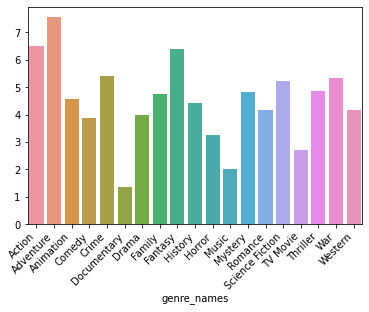

In [14]:
fix, ax = plt.subplots()
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values)
plt.xticks(rotation=45, ha='right')

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


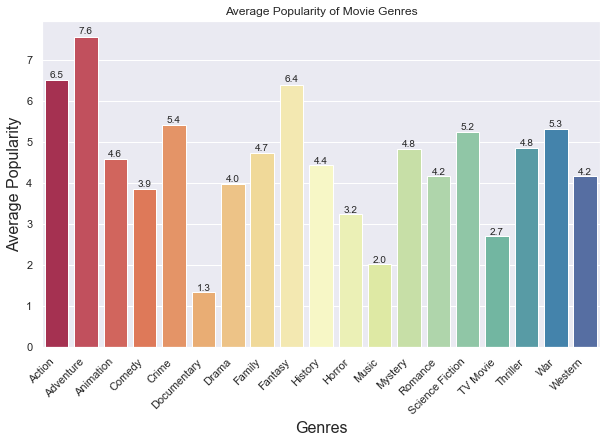

In [43]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values,
            palette = "Spectral")
            
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genres', fontsize =16)
plt.ylabel('Average Popularity', fontsize =16)
ax.set(title='Average Popularity of Movie Genres')
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=10) 

### Create a bar plot for genres grouped by voter average

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


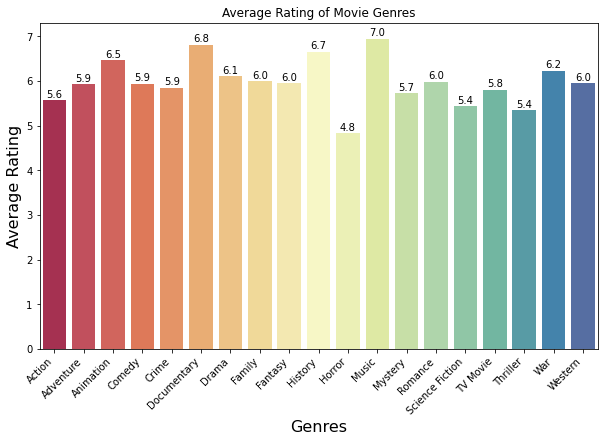

In [16]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(exploded_genre_df.groupby('genre_names')['vote_average'].mean().index,
            exploded_genre_df.groupby('genre_names')['vote_average'].mean().values,
            palette = "Spectral")
            
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genres', fontsize=16);
plt.ylabel('Average Rating', fontsize=16);
ax.set(title='Average Rating of Movie Genres')

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=10) 

### Made a scatterplot to see if average rating and average popularity have a correlation - they dont

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average Popularity')

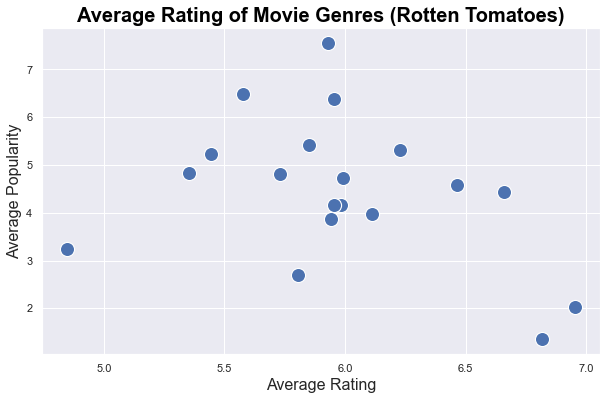

In [56]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
chart = sns.scatterplot(exploded_genre_df.groupby('genre_names')['vote_average'].mean().values,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values,
            palette = "Spectral",
            s = 200)
chart.set_title('Average Rating of Movie Genres (Rotten Tomatoes)', fontdict={'size': 20, 'weight': 'bold', 'color': 'black'})
plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Average Popularity', fontsize = 16)


### Sorted the exploded db_mov based on highest to lowest popularity

In [18]:
exploded_genre_df.sort_values(by = 'popularity', ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Fantasy
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Action
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Action
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
14022,14022,[10402],285621,en,Spacehog: Summerland 2014,0.600,2014-06-26,Spacehog: Summerland 2014,4.0,2,Music
14023,14023,"[35, 16, 12]",280890,en,Wings: Sky Force Heroes,0.600,2014-07-08,Wings: Sky Force Heroes,4.0,2,Comedy
14023,14023,"[35, 16, 12]",280890,en,Wings: Sky Force Heroes,0.600,2014-07-08,Wings: Sky Force Heroes,4.0,2,Animation
14023,14023,"[35, 16, 12]",280890,en,Wings: Sky Force Heroes,0.600,2014-07-08,Wings: Sky Force Heroes,4.0,2,Adventure


### Looked at Rotten Tomato dataset and exploded the genres 

In [19]:
rot_tom

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [20]:
rot_tom['genre_names'] = rot_tom['genres'].str.split(',')

In [21]:
rt_explode = rot_tom.explode('genre_names')

In [22]:
rt_explode.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'genre_names'],
      dtype='object')

In [23]:
rt_explode.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,genre_names
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Action & Adventure
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Comedy
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Drama
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Science Fiction & Fantasy
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,Comedy


In [24]:
rt_explode.groupby('genre_names')['tomatometer_rating'].mean()

genre_names
 Animation                    64.400000
 Anime & Manga                75.368421
 Art House & International    67.589099
 Classics                     76.865922
 Comedy                       61.928058
 Cult Movies                  63.573171
 Documentary                  77.208211
 Drama                        65.517241
 Faith & Spirituality         63.886076
 Gay & Lesbian                57.410256
 Horror                       55.831512
 Kids & Family                55.437676
 Musical & Performing Arts    71.010152
 Mystery & Suspense           55.983632
 Romance                      60.579031
 Science Fiction & Fantasy    55.866189
 Special Interest             77.463217
 Sports & Fitness             71.005618
 Television                   72.574627
 Western                      68.575342
Action & Adventure            54.184359
Animation                     63.882979
Art House & International     71.829450
Classics                      79.120721
Comedy                      

In [25]:
rt_explode = rt_explode.head(15)

### Made a scatterplot of the average audience rating and critic rating to see any discrepency

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


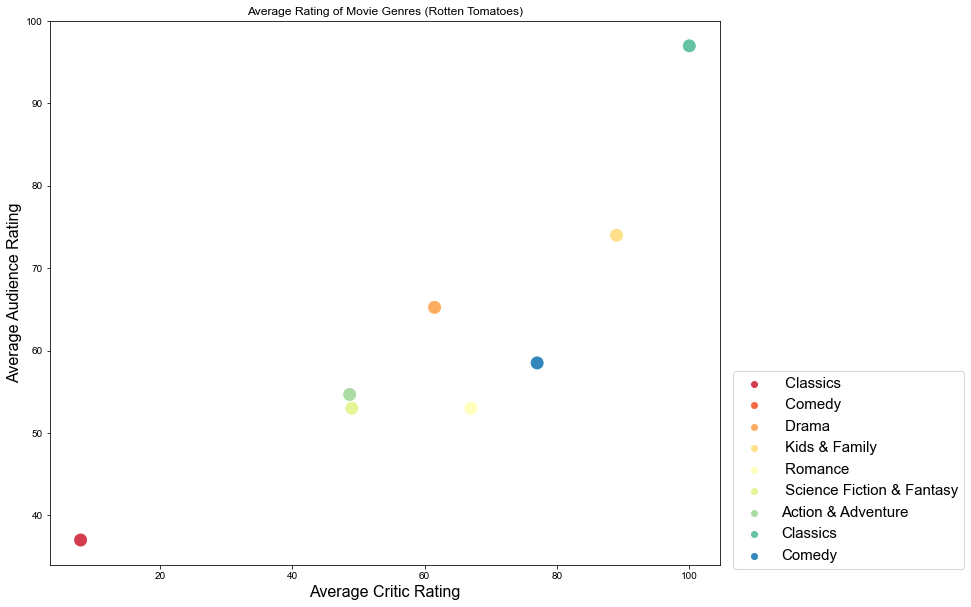

In [26]:
fix, ax = plt.subplots(1,1, figsize=(12,10))
sns.scatterplot(rt_explode.groupby('genre_names')['tomatometer_rating'].mean().values,
                rt_explode.groupby('genre_names')['audience_rating'].mean().values,
                hue = rt_explode.groupby('genre_names')['audience_rating'].mean().index,
                s=200,
                palette = "Spectral")

plt.xlabel('Average Critic Rating', fontsize=16);
plt.ylabel('Average Audience Rating', fontsize=16);
ax.set(title='Average Rating of Movie Genres (Rotten Tomatoes)')
plt.legend(bbox_to_anchor=(1.02, 0.357), loc='upper left', borderaxespad=0, fontsize = 15)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
#for i in range(rt_explode.groupby('genre_names')['tomatometer_rating'].mean().size):
    #plt.text(x=rt_explode.groupby('genre_names')['tomatometer_rating'].mean()[i]+0.4,
            #y=rt_explode.groupby('genre_names')['audience_rating'].mean()[i]+0.3,
             #s=rt_explode.groupby('genre_names')['tomatometer_rating'].mean().index[i])

### We made this plot to see if there is a discrepency between audience rating and critic ratings. this plot shows there is a clear correlation between the two 